### Problem Statement

<p>Unsolicited emails can be a great nuisance for several reasons, but two of them standout out of the crowd – storage and security. We only want to keep emails that we care about thereby optimizing our use of the limited storage provided by Email Service providers. Also, we want to avoid getting phishing emails and emails containing spywares or other malicious programs. Tracking spams manually can be difficult, but thanks to machine learning, this process can be automated.</p>

<p>The aim of this project is to develop a machine learning model that would be able to determine if an email is a spam or not. This is a binary classification problem.</p>

#### About the Dataset

The dataset we would be using to train our model was retrieved from [Kaggle.](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv) The csv file contains $5172$ rows, each row for each email. There are $3002$ columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : $1$ for spam, $0$ for not spam. The remaining $3000$ columns are the $3000$ most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all $5172$ emails are stored in a compact dataframe rather than as separate text files.

#### Exploratory Data Analysis

Some of the features of the dataset are stop-words. I will drop them in the preprocessing stage since they don't have any impact on predictions. The only feature that's not an integer is the "Email No." feature. Since they don't also have an impact on predictions, I will drop it as well. The EDA also reveals that the proportion of spam and not spam emails in the dataset are not equal. Therefore, the classification model will not assign equal weights to them.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

##### Read the data and check the first two rows

In [55]:
# read the data
emails = pd.read_csv('emails.csv')

# top 2 rows
emails.head(2)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0


In [3]:
emails.shape

(5172, 3002)

##### Check features that are stopwords

In [24]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
# get columns that are stopwords

is_a_stopword = emails.columns.isin(stopwords.words('english'))
emails.columns[is_a_stopword]

Index(['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is',
       ...
       'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself',
       'ma', 'aren'],
      dtype='object', length=134)

##### Get columns that are not integers

In [45]:
# select non-integer features
emails.select_dtypes(include=['object', 'bool', 'float', 'category']).head()

,Email No.
0,Email 1
1,Email 2
2,Email 3
3,Email 4
4,Email 5


##### Check for duplicate and missing values

In [47]:
# check for missing values
emails.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [49]:
# check for duplicates

emails.duplicated().sum()

0

##### Comparing the number of emails that are spam and not spam

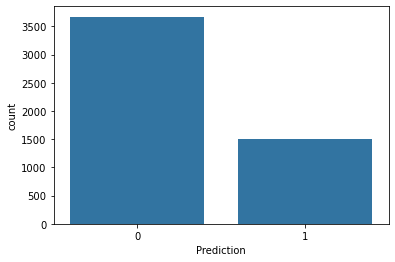

In [50]:
# count plot of the Prediction column

sns.countplot(data=emails, x='Prediction', color=sns.color_palette()[0])

plt.show();

#### Preprocessing

I dropped the "Email No." column and all columns that are stop words. The "Prediction" column is saved in the target variable `y` while the other columns is saved in the features variable `X`. The dataset is also split into $70\%$ train and $30\%$ test sets.

In [58]:
from sklearn.model_selection import train_test_split

In [56]:
# remove all stop words

no_stop_words = emails.loc[:, ~is_a_stopword].copy()

no_stop_words.shape

(5172, 2868)

In [57]:
# drop "Email No."

no_stop_words.drop(columns="Email No.", inplace=True)

In [61]:
# split dataset to train and test sets

X = no_stop_words.drop(columns="Prediction")
y = no_stop_words[['Prediction']]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=7, stratify=y)

print("train set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

train set: (3620, 2866) (3620, 1)
test set: (1552, 2866) (1552, 1)


##### Model Training

Since this is a binary classification problem, I will be training and evaluating a classification model. I chose to use Logistic Regression as my base model because it is a simple model that's easy to interpret. I chose Random Forest as my complementary model because it is less sensitive to outliers.